In [140]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve,mean_squared_error,mean_absolute_error
import warnings 
warnings.filterwarnings('ignore')

# Data Preprocessing

In [109]:
df = pd.read_csv("mushrooms.csv")

In [110]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All columns have object datatype

In [112]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null value present in our datatypes.

<AxesSubplot:>

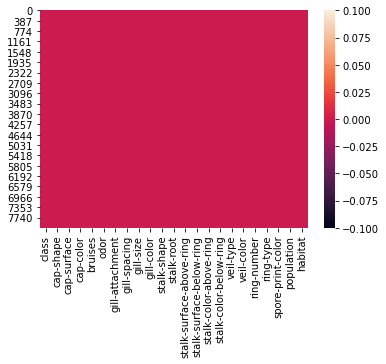

In [113]:
sns.heatmap(df.isnull())

In [114]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [115]:
df.shape

(8124, 23)

In [116]:
df["class"].unique()

array(['p', 'e'], dtype=object)

‘p’ is poisonous and ‘e’ is edible

In [117]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

As we can see, there are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.

<AxesSubplot:>

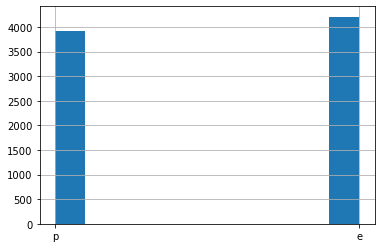

In [118]:
df["class"].hist(grid=True)

We can see values of p and e are balanced hence there is no chance of class imbalance. Dataset is balanced.

In [119]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

We have categorical data in our dataset hence we have to use Label Encoder which will convert categorical values to ordinal values.
As we have seen before that all columns are having object datatype so we first convert this object type to category.

In [120]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

As we can see, our columns are now of type ‘category’. We can now use LabelEncoder to convert categorical values to ordinal.

In [121]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


All columns are converted to ordinal values from categorical values.

# EDA Analysis

In [122]:
dfcorr=df.corr()
dfcorr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


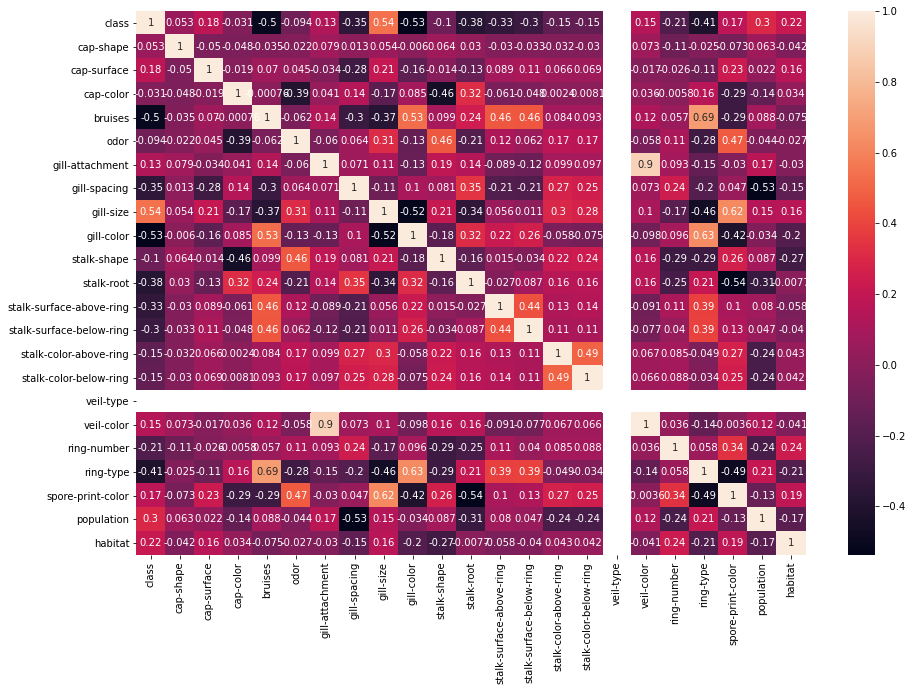

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcorr,annot=True)
plt.show()

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

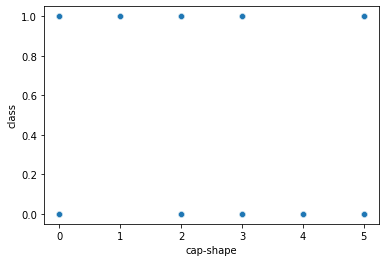

In [124]:
sns.scatterplot(x="cap-shape",y="class",data=df)

<AxesSubplot:xlabel='gill-color', ylabel='class'>

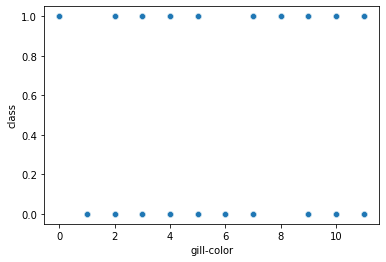

In [125]:
sns.scatterplot(x="gill-color",y="class",data=df)

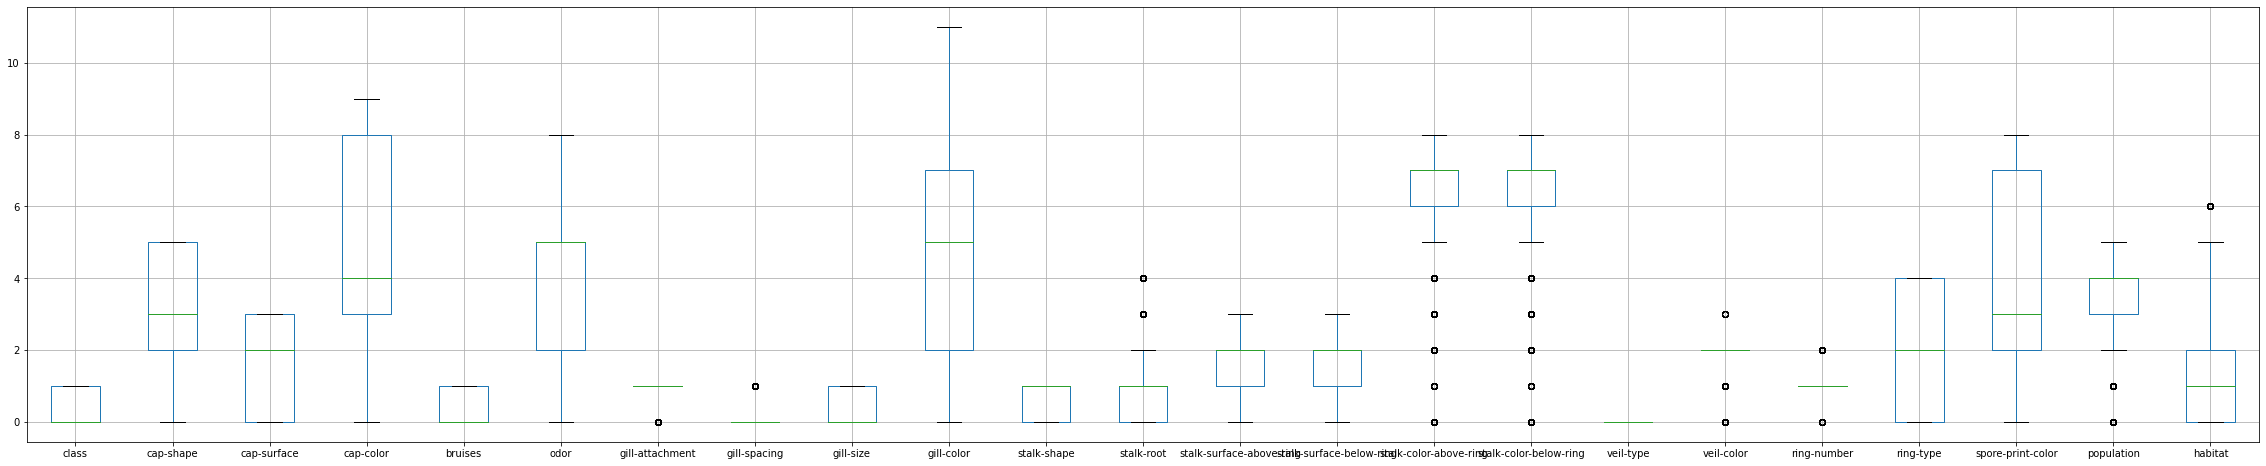

In [126]:
df.boxplot(figsize=[40,8])
plt.show()

In [127]:
x=df.iloc[:,1:23]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [128]:
y=df["class"]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

All columns are categorical hence there is no need to check skewness and outliers.

# Model Building

# Finding the best Random_state

In [132]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.30)
    mod=LogisticRegression()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9585726004922067  on Random_state  21


In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=21, test_size=0.1)

# Accuracy score of all models in one function

In [135]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
Accuracy Score: 0.977859778597786
Confusion Matrix: [[412  10]
 [  8 383]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98       422
           1       0.97      0.98      0.98       391

    accuracy                           0.98       813
   macro avg       0.98      0.98      0.98       813
weighted avg       0.98      0.98      0.98       813



Accuracy score of DecisionTreeClassifier() is:
Accuracy Score: 1.0
Confusion Matrix: [[422   0]
 [  0 391]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       391

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Accuracy score of SVC() is:
Accuracy Score: 0.995079950799508
Confusio

# Cross Validation

In [136]:
cvs=cross_val_score(LogisticRegression(),x,y,cv=5)
print("cross validation score of LogisticRegression model :",cvs.mean())
cvs=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model :",cvs.mean())
cvs=cross_val_score(SVC(),x,y,cv=5)
print("cross validation score of SVC model :",cvs.mean())
cvs=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("cross validation score of RandomForestClassifier model :",cvs.mean())

cross validation score of LogisticRegression model : 0.8403339901477832
cross validation score of DecisionTreeClassifier model : 0.9271032967032967
cross validation score of SVC model : 0.841292231906025
cross validation score of RandomForestClassifier model : 0.8886895035998486


If we compare accuracy score and cross validation score so we can see DecisionTreeClassiier is best model for this project.

# Hyperparameter Tuning for DecisionTreeClassifier

In [145]:
parameter={'max_depth': np.arange(2,10),
          'criterion':['gini','entrypy']}

In [146]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [147]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrypy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [148]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [149]:
Final_mod=DecisionTreeClassifier(criterion='gini',max_depth=8)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


In [150]:
import joblib
joblib.dump(Final_mod,"MushroomProject.pkl")

['MushroomProject.pkl']

we make dump of DecisionTreeClassifier model in .pkl file.

In [151]:
model=joblib.load("MushroomProject.pkl")

we can use model for predicting new results

In [152]:
prediction=model.predict(x_test)
print('Predicted result price',prediction)
print('Actual price',y_test)

Predicted result price [0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0
 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0
 1

In [153]:
print(model.score(x_test,y_test))

1.0


In [154]:
predict=pd.DataFrame(prediction)
predict

,0
0,0
1,0
2,1
3,0
4,1
...,...
808,0
809,1
810,0
811,0


We change the predicted values to dataframe so that we can save those results.

In [155]:
predict.to_csv('Results.csv')

saving the predicted result in .csv file